# Install Requirements

In [2]:
%pip install pandas matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_61589/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load Data

In [4]:
from pathlib import Path

REPOSITORY_PATH = Path().absolute().parent
DATA_DIR = REPOSITORY_PATH / Path("data")

assert DATA_DIR.is_dir()

## Load Sources DB

In [5]:
BRONNEN_DB_DIR = DATA_DIR / Path(
    "682ff2f6-da1c-4769-85d8-c0d4c2ae4f20_Export-807bbbf6-b5fb-48aa-89a7-b62fe3b5b0bf"
)
assert BRONNEN_DB_DIR.is_dir()

BRONNEN_FILE = BRONNEN_DB_DIR / Path(
    "Bronnen DB ebb1bca364c64cfebc8109b4fc3951eb_all.csv"
)
assert BRONNEN_FILE.is_file()

In [6]:
sources = pd.read_csv(BRONNEN_FILE)
sources.head()

,Name,Sector,ads done,Reclame,uBlocked trackers,Commercialiteit,Conclusie over doel vd bron,Thumbs up?,Status,About page,...,Resultaten: vrije labels,NR,Resultaten DB,Extra voorbeeldpagina,URL Domein,Created time,Created by,URL Moederbedrijf,SlimZ Resultaten DB,Resultaten: toegankelijkheid
0,Welkom in de Geschiedenis - YouTube,NaN,No,NaN,NaN,not_for_profit,kindercontent zonder veel informatieve waarde,NaN,Not started,NaN,...,NaN,NaN,NaN,https://www.youtube.com/@Welkomindegeschiedenis,NaN,"January 22, 2024 12:12 PM",Maarten Sprenger,NaN,NaN,NaN
1,nibud.nl,Onafhankelijk Kennis- en adviescentrum,Yes,none,1.0,not_for_profit,kennisbank/centrum +,Ja,Done,https://www.nibud.nl/over-het-nibud/over-de-or...,...,NaN,1,Het Nibud (Nationaal Instituut voor Budgetvoor...,NaN,https://www.nibud.nl/,"January 15, 2024 3:46 PM",Maarten Sprenger,NaN,NaN,redelijk begrijpelijk
2,monumentaltrees.com,Individuele personen div,Yes,many_ads,3.0,not_for_profit,gebruikersplatform zonder kwaliteitsgarantie,Just-in-case,Done,https://www.monumentaltrees.com/nl/content/ove...,...,NaN,1,Monumentale bomen in het Tienbunderbos in Rill...,NaN,https://www.monumentaltrees.com/,"January 15, 2024 3:02 PM",Maarten Sprenger,NaN,NaN,eenvoudig
3,tracesofwar.nl,Onafhankelijk Kennis- en adviescentrum,No,limited_ads,3.0,not_for_profit,kennisbank/centrum +,Ja,Needs peer-review,"https://www.tracesofwar.nl/about.asp, https://...",...,NaN,1,Calvariekruis Begraafplaats Rillaar - Rillaar ...,https://www.tracesofwar.nl/persons/86014/Abe-H...,https://www.tracesofwar.nl/,"January 15, 2024 3:00 PM",Maarten Sprenger,https://www.stiwot.nl/,NaN,redelijk begrijpelijk
4,loket.onroerenderfgoed.be,Overheid (of i.o.v.),Yes,none,2.0,not_for_profit,overheidsinformatie (overige),Ja,Almost completed,https://www.onroerenderfgoed.be/over-ons,...,NaN,1,Archeologienota Rillaar (Aarschot) – Diesteste...,NaN,https://loket.onroerenderfgoed.be/,"January 15, 2024 2:55 PM",Maarten Sprenger,https://omgeving.vlaanderen.be/inspectie-en-ha...,NaN,complex


## Load Query DB

In [7]:
QUERY_DIR = DATA_DIR / Path(
    "cfa63dc5-5782-4ec0-8b91-fe11ca365da8_Export-55440095-ee9b-443a-815c-3e859aa30db4/Query DB 01 5a4aec0449af4acc87a45c19be574353"
)
assert QUERY_DIR.is_dir()

QUERY_FILE = QUERY_DIR / Path("Untitled cacf3a0313a84561bac9b6ea48ecc189_all.csv")
assert QUERY_FILE.is_file()

In [8]:
all_queries = pd.read_csv(QUERY_FILE)

queries = (
    all_queries[all_queries["ok"] == "Yes"]
    .drop(["Created time"], axis=1)
    .astype({"Query": pd.StringDtype()})
)
queries.head()

,Query,Onderwerp,Soort Query (select),age,Multi extra,Kennisvenster?,'Samenvatting'?,Extra (top-down),Google,Video Facet,Schooltv /10 videos,Opmerkingen,ok,Add Results,Resultaten DB,Date,Bronnen DB
0,leven,Natuur/Biologie,Named entity,8.0,Media(ster),Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=leven&rlz=1C5C...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN
1,wat betekent schotse,Taal/Cultuur,Vragen,10.0,NaN,Nee,Ja,Vragen van anderen (top),https://www.google.com/search?q=wat+betekent+s...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,Schotse - 2 definities - Encyclo (https://www....,NaN,NaN
2,middellandse zee,Aardrijkskunde,Named entity,11.0,NaN,Ja uitgebreid,Nee,"Afbeeldingen carroussel (top), Gerelateerde zo...",https://www.google.com/search?q=middellandse+z...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN
3,De smurfen,Taal/Cultuur,Named entity,10.0,Merk/Bedrijf,Ja,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.nl/search?q=De+smurfen&sca_...,https://www.google.nl/search?sca_esv=578451392...,-,NaN,Yes,Done,NaN,NaN,google.nl/com (https://www.notion.so/google-nl...
4,keurmerk max,Maatschappij,2 of meer woorden,7.0,NaN,Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=keurmerk+max&r...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN


In [9]:
len(queries)

100

## Load Results

In [10]:
RESULTS_DIR = DATA_DIR / Path(
    "fa6530a6-6a8d-4318-942d-346ef10d7eed_Export-5088c07d-f687-462e-b242-56d78fe82a3d"
)
assert RESULTS_DIR.is_dir()

RESULTS_FILE = RESULTS_DIR / Path(
    "Resultaten DB 01 a7ef3ccdfad447148261278e6ca29856_all.csv"
)
assert RESULTS_FILE.is_file()

In [11]:
results = (
    pd.read_csv(RESULTS_FILE)
    .drop(["Created time"], axis=1)
    .rename(columns=lambda x: x.strip())
    .astype({"Query": pd.StringDtype()})
)
results.head()

,Titel resultaat,Link/resultaat,Query,Ranking,vrije tags,Bronnen DB,Opmerking,Toegankelijkheid doelgroep,Relevant?,Soort Resultaat,Bron: Thumbs up?,Bron: Trackers,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,OnderzoekNr
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,geld (https://www.notion.so/geld-03503decdc9c4...,9,NaN,rijksoverheid.nl (https://www.notion.so/rijkso...,NaN,redelijk begrijpelijk,relevant,informatief,Ja,NaN,not_for_profit,Maarten Sprenger,Almost completed,overheidsinfo (of i.o.v.),1
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,geld (https://www.notion.so/geld-03503decdc9c4...,8,NaN,nibud.nl (https://www.notion.so/nibud-nl-624f2...,NaN,redelijk begrijpelijk,relevant,"informatief, navigational",Ja,NaN,not_for_profit,Maarten Sprenger,Done,"kennisbank/centrum,voorlichting",1
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,geld (https://www.notion.so/geld-03503decdc9c4...,7,NaN,rtlnieuws.nl (https://www.notion.so/rtlnieuws-...,NaN,nvt,relevant,navigational,Just-in-case,NaN,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws",1
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,geld (https://www.notion.so/geld-03503decdc9c4...,6,NaN,ad.nl (https://www.notion.so/ad-nl-800ddede7f5...,NaN,nvt,relevant,navigational,Just-in-case,NaN,commercieel,Maarten Sprenger,Done,"Informatie_primair_doel,journalistiek,nieuws,p...",1
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,geld (https://www.notion.so/geld-03503decdc9c4...,5,NaN,telegraaf.nl (https://www.notion.so/telegraaf-...,NaN,nvt,relevant,navigational,NaN,NaN,commercieel,Maarten Sprenger,Needs peer-review,"journalistiek,nieuws,paywall (geheel/gedeeltel...",1


In [12]:
COLUMNS_WITH_LINK = ["Query", "Bronnen DB"]
assert all(column in results.columns for column in COLUMNS_WITH_LINK)

for column in COLUMNS_WITH_LINK:
    results[column] = (results[column].str.split(" \(").str[0]).astype(pd.StringDtype())
results.head()

,Titel resultaat,Link/resultaat,Query,Ranking,vrije tags,Bronnen DB,Opmerking,Toegankelijkheid doelgroep,Relevant?,Soort Resultaat,Bron: Thumbs up?,Bron: Trackers,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,OnderzoekNr
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,geld,9,NaN,rijksoverheid.nl,NaN,redelijk begrijpelijk,relevant,informatief,Ja,NaN,not_for_profit,Maarten Sprenger,Almost completed,overheidsinfo (of i.o.v.),1
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,geld,8,NaN,nibud.nl,NaN,redelijk begrijpelijk,relevant,"informatief, navigational",Ja,NaN,not_for_profit,Maarten Sprenger,Done,"kennisbank/centrum,voorlichting",1
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,geld,7,NaN,rtlnieuws.nl,NaN,nvt,relevant,navigational,Just-in-case,NaN,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws",1
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,geld,6,NaN,ad.nl,NaN,nvt,relevant,navigational,Just-in-case,NaN,commercieel,Maarten Sprenger,Done,"Informatie_primair_doel,journalistiek,nieuws,p...",1
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,geld,5,NaN,telegraaf.nl,NaN,nvt,relevant,navigational,NaN,NaN,commercieel,Maarten Sprenger,Needs peer-review,"journalistiek,nieuws,paywall (geheel/gedeeltel...",1


## Match Sources and Queries

In [13]:
query = queries["Query"].sample(n=1).iloc[0]
query

'greta thunberg'

In [14]:
results.loc[results["Query"].str.startswith(query)].sort_values(by="Ranking")

,Titel resultaat,Link/resultaat,Query,Ranking,vrije tags,Bronnen DB,Opmerking,Toegankelijkheid doelgroep,Relevant?,Soort Resultaat,Bron: Thumbs up?,Bron: Trackers,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,OnderzoekNr
215,Greta Thunberg - Wikipedia,https://nl.wikipedia.org/wiki/Greta_Thunberg,greta thunberg,1,NaN,wikipedia.org,NaN,complex,relevant,informatief,Ja,NaN,not_for_profit,Maarten Sprenger,Done,"Informatie_primair_doel,community,user_generat...",1
214,Greta Thunberg (@gretathunberg) • Instagram-fo...,https://www.instagram.com/gretathunberg/,greta thunberg,2,NaN,instagram.com,NaN,nvt,relevant,social_media,Just-in-case,NaN,commercieel,Maarten Sprenger,Done,social_media,1
213,Greta Thunberg - Wikipedia,https://en.wikipedia.org/wiki/Greta_Thunberg,greta thunberg,3,NaN,wikipedia.org,NaN,complex,relevant,informatief,Ja,NaN,not_for_profit,Maarten Sprenger,Done,"Informatie_primair_doel,community,user_generat...",1
212,Greta Thunberg (@GretaThunberg) / X,https://twitter.com/GretaThunberg,greta thunberg,4,NaN,twitter.com,NaN,nvt,relevant,social_media,Just-in-case,NaN,ultra_commercieel,Maarten Sprenger,Done,social_media,1
211,greta thunberg - Google Zoeken Videos,https://www.google.nl/search?sca_esv=596572399...,greta thunberg,5,NaN,google.nl/com,NaN,nvt,relevant,navigational,Just-in-case,NaN,ultra_commercieel,Maarten Sprenger,Almost completed,NaN,1
210,Greta Thunberg: Who is the climate activist an...,https://www.bbc.com/news/world-europe-49918719,greta thunberg,6,NaN,bbc.com,NaN,complex,relevant,informatief,Ja,NaN,not_for_profit,Maarten Sprenger,Done,"infotainment,journalistiek,log_in (geheel/gede...",1
209,Wie is Greta Thunberg? | NPO Kennis,https://npokennis.nl/story/596/wie-is-greta-th...,greta thunberg,7,NaN,npokennis.nl,NaN,redelijk begrijpelijk,relevant,informatief,Ja,NaN,not_for_profit,Maarten Sprenger,Almost completed,wetenschap,1
208,Greta Thunberg | Facebook,https://www.facebook.com/gretathunbergsweden/,greta thunberg,8,NaN,facebook.com,NaN,nvt,relevant,social_media,Just-in-case,NaN,ultra_commercieel,Maarten Sprenger,Almost completed,social_media,1
207,"Nooit meer 'klimaatspijbelen', Greta Thunberg ...",https://nos.nl/artikel/2478331-nooit-meer-klim...,greta thunberg,9,NaN,nos.nl,NaN,redelijk begrijpelijk,relevant,informatief,Ja,NaN,not_for_profit,Maarten Sprenger,Done,"infotainment,journalistiek,nieuws",1
206,Hoe goed ken jij Greta Thunberg? Test je kenni...,https://www.ad.nl/sterren/hoe-goed-ken-jij-gre...,greta thunberg,10,NaN,ad.nl,NaN,te simpel,niet_relevant,informatief,Just-in-case,NaN,commercieel,Maarten Sprenger,Done,"Informatie_primair_doel,journalistiek,nieuws,p...",1


# Analysis

## Search Results

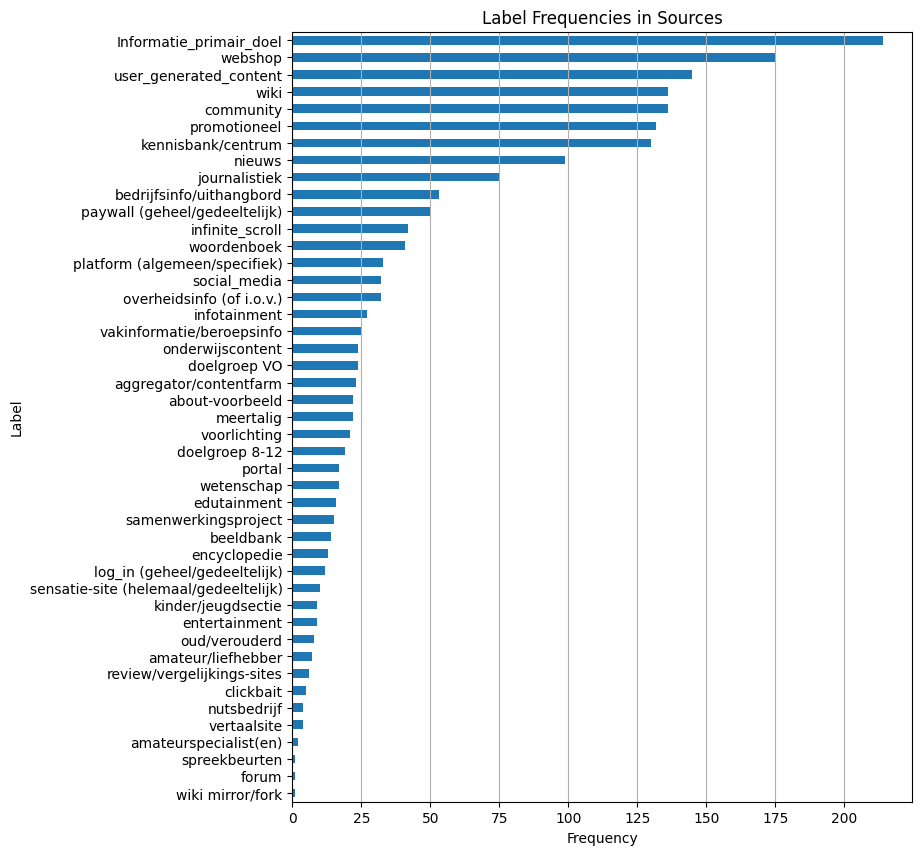

In [15]:
results["Bron: Vrije labels"].str.split(",").explode().value_counts(
    ascending=True
).plot(
    kind="barh",
    title="Label Frequencies in Sources",
    xlabel="Frequency",
    ylabel="Label",
    figsize=(8, 10),
).grid(axis="x")

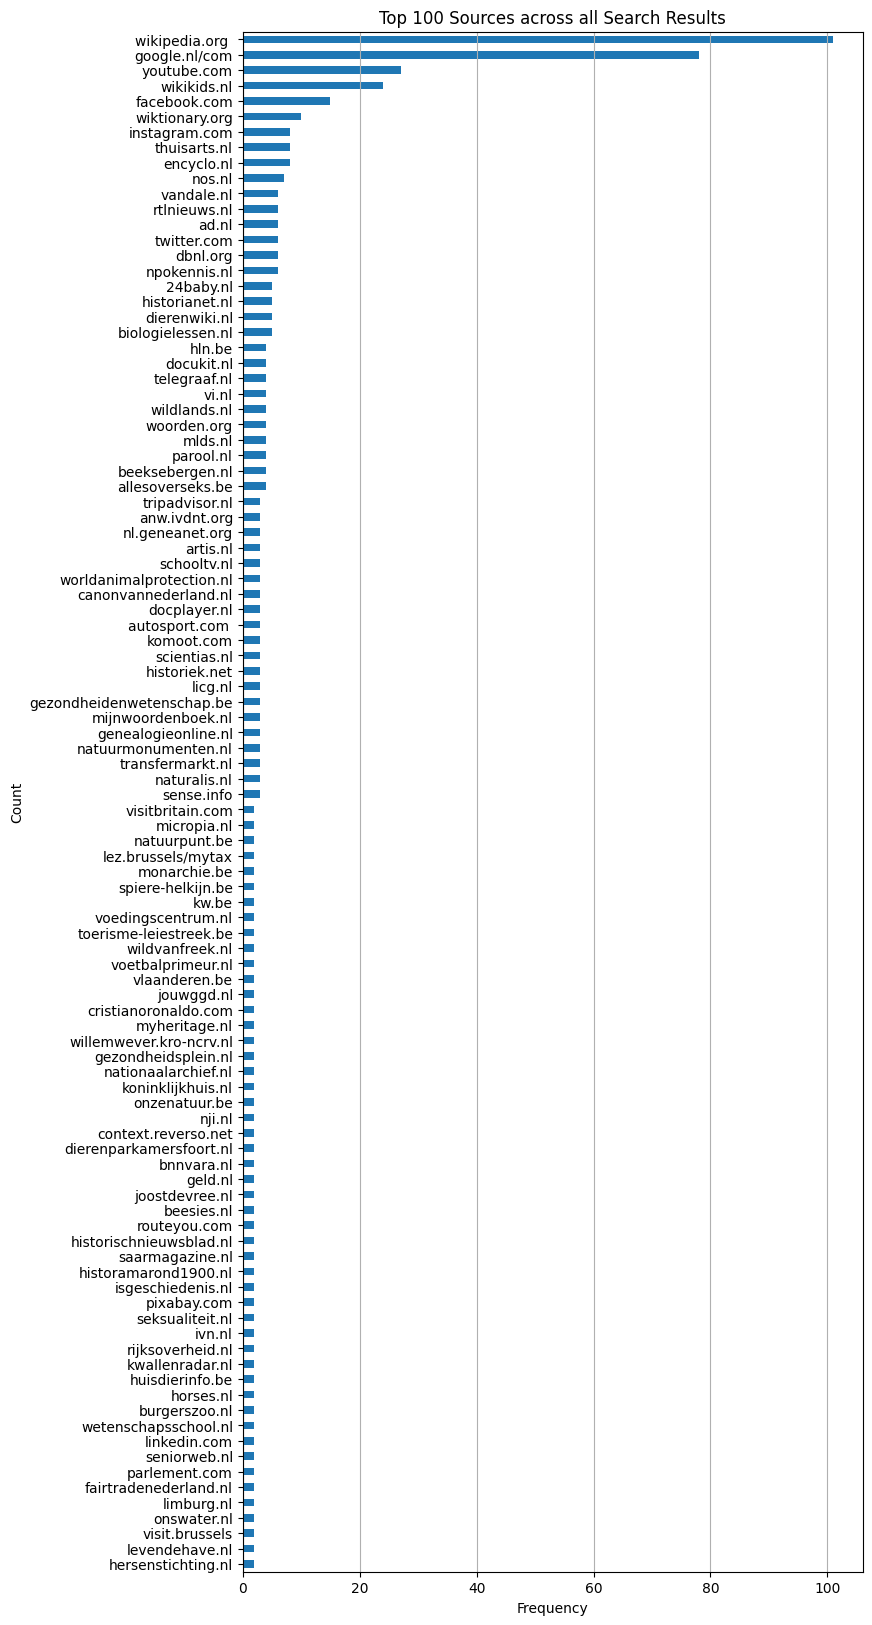

In [33]:
n = 100

results["Bronnen DB"].value_counts().filter(regex="^[^*]")[:n].sort_values(
    ascending=True
).plot(
    kind="barh",
    figsize=(8, n // 5),
    title=f"Top {n} Sources across all Search Results",
    xlabel="Frequency",
    ylabel="Count",
).grid(axis="x")

## Sources

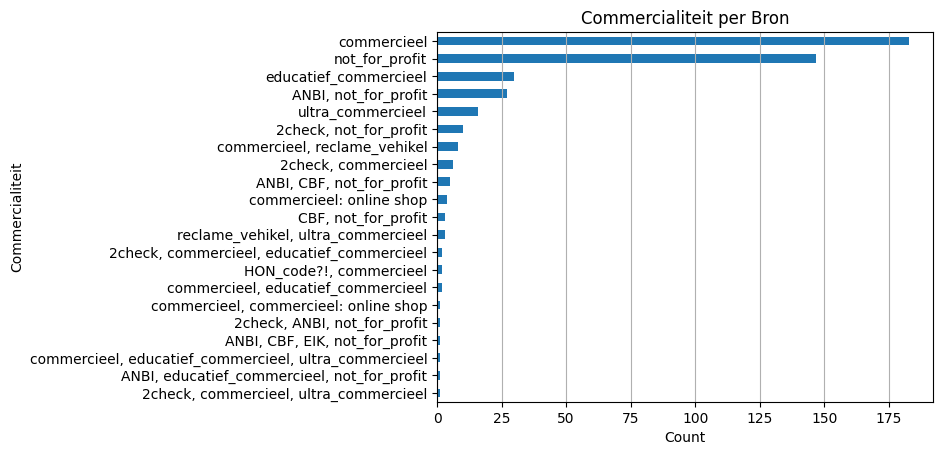

In [17]:
sources["Commercialiteit"].value_counts(ascending=True).plot(
    kind="barh",
    title="Commercialiteit per Bron",
    xlabel="Count",
    ylabel="Commercialiteit",
).grid(axis="x")

## Queries and Result Pages

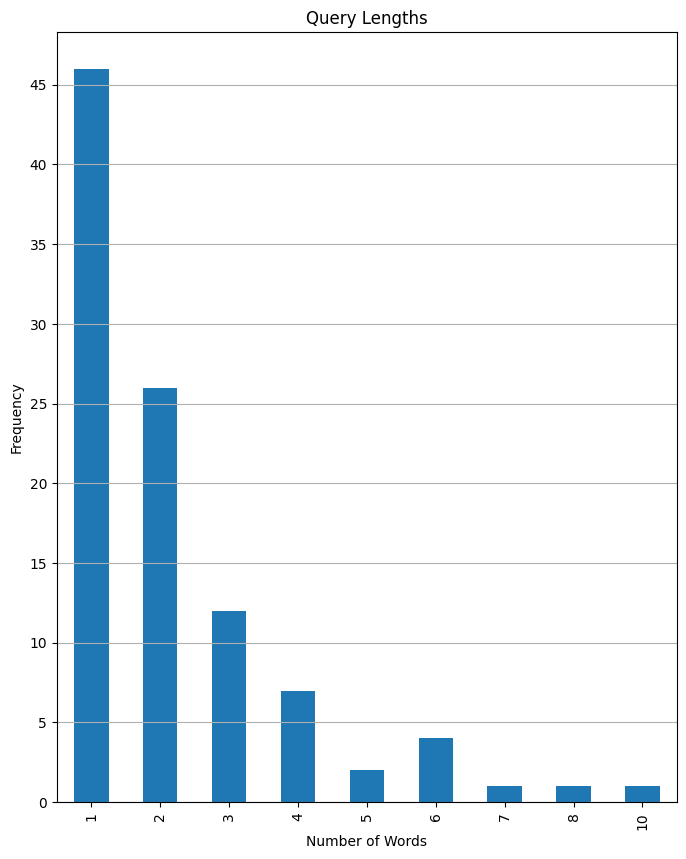

In [18]:
queries["Query"].str.split(" ").str.len().value_counts().sort_index().plot(
    kind="bar",
    title="Query Lengths",
    ylabel="Frequency",
    xlabel="Number of Words",
    figsize=(8, 10),
    yticks=range(0, 50, 5),
).grid(axis="y")

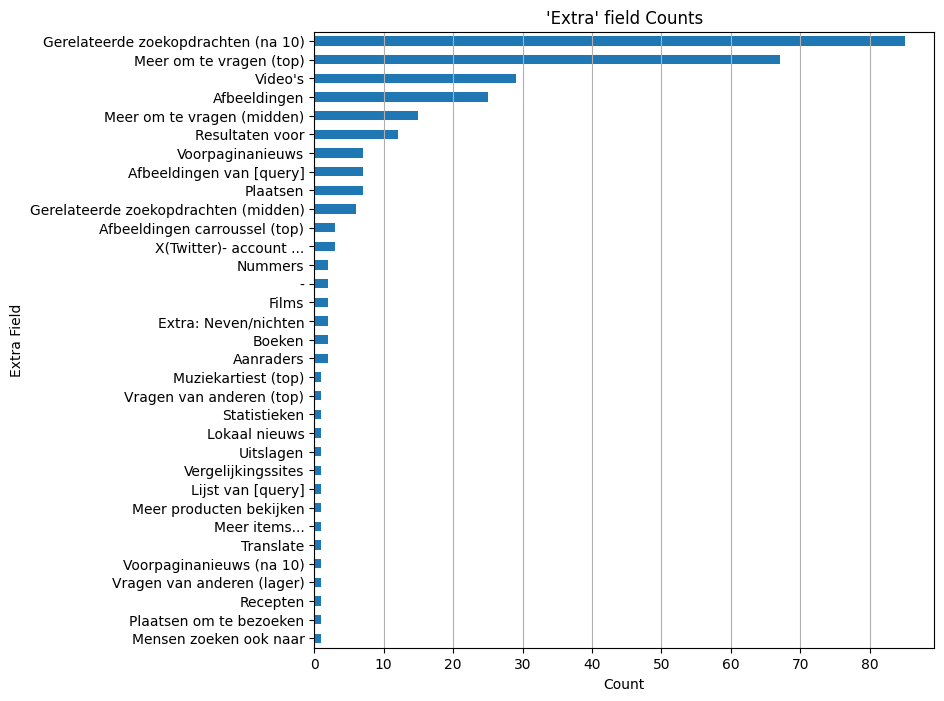

In [19]:
queries["Extra (top-down)"].str.split(", ").explode().value_counts(ascending=True).plot(
    kind="barh",
    title="'Extra' field Counts",
    figsize=(8, 8),
    xlabel="Count",
    ylabel="Extra Field",
).grid(axis="x")